In [1]:
import numpy as np
import pandas as pd 
import networkx as nx 
import stats
import matplotlib.pyplot as plt

In [2]:
files = stats.get_files("data/graphs")[:-1]

In [10]:
# files

In [17]:
# G = nx.read_gpickle("data/graphs"+"/"+files[10])

In [18]:
# mG = stats.filter_graph(G,"gender","male")
# fG = stats.filter_graph(G,"gender","female")

In [44]:
# stats.network_size(mG)

In [45]:
# stats.network_size(fG)

In [28]:
# lst = []
# for file in files:
#     G = nx.read_gpickle("data/graphs"+"/"+file)
#     mG = stats.filter_graph(G,"gender","male")
#     fG = stats.filter_graph(G,"gender","female")
#     sub =[file,stats.network_size(fG), stats.network_size(mG)]
#     lst.append(sub)
    
# df = pd.DataFrame(lst)

In [3]:
# df.columns = ["file","f_nodes","m_nodes"]
# df

In [8]:
def save_network_size(path_files, path_save):
    lst = []
    for file in files:
        G = nx.read_gpickle("data/graphs"+"/"+file)
        mG = stats.filter_graph(G,"gender","male")
        fG = stats.filter_graph(G,"gender","female")
        sub =[file,stats.network_size(fG), stats.network_size(mG)]
        lst.append(sub)

    df = pd.DataFrame(lst)
    df.columns = ["file","f_nodes","m_nodes"]
    df.to_json(path_save)
    print("Saved to: ", path_save)
    return df

In [10]:
net_size = save_network_size("data/graphs/", "data/stats/net_size.csv")

Saved to:  data/stats/net_size.csv


In [11]:
def save_network_size_per(attribute, value, path_files, path_save):
    lst = []
    for file in files:
        G = nx.read_gpickle("data/graphs"+"/"+file)
        mG = stats.filter_graph(G,"gender","male")
        mG = stats.filter_graph(mG,attribute, value)
        fG = stats.filter_graph(G,"gender","female")
        fG = stats.filter_graph(fG,attribute, value)
        sub =[file,stats.network_size(fG), stats.network_size(mG)]
        lst.append(sub)

    df = pd.DataFrame(lst)
    df.columns = ["file","f_nodes","m_nodes"]
    df.to_json(path_save)
    print("Saved to: ", path_save)
    return df

In [12]:
net_size_de = save_network_size_per("nationality", "german", "data/graphs/", "data/stats/net_size_ger.csv")
net_size_us = save_network_size_per("nationality", "american", "data/graphs/", "data/stats/net_size_us.csv")
net_size_ru = save_network_size_per("nationality", "russian", "data/graphs/", "data/stats/net_size_ru.csv")
net_size_gb = save_network_size_per("nationality", "british", "data/graphs/", "data/stats/net_size_gb.csv")
net_size_fr = save_network_size_per("nationality", "french", "data/graphs/", "data/stats/net_size_fr.csv")

Saved to:  data/stats/net_size_ger.csv
Saved to:  data/stats/net_size_us.csv
Saved to:  data/stats/net_size_ru.csv
Saved to:  data/stats/net_size_gb.csv
Saved to:  data/stats/net_size_fr.csv


In [13]:
# df = pd.read_json("data/politician-data.json")

In [14]:
# net_size_serbia

In [16]:

# plt.xticks(f_nodes, t)
# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.plot(np.arange(1,33),m_nodes,marker=">", label="male")
# plt.plot(np.arange(1,33),f_nodes, marker="X",label="female")
# plt.legend(loc='upper left')
# plt.yscale('log')
# plt.xlabel("month")
# plt.ylabel("number of politicians")
# plt.show()

In [86]:
def plot_genders(df, name ,scale):
    m_nodes = df.m_nodes.values
    f_nodes = df.f_nodes.values
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1,33),m_nodes,marker=">", label="male")
    plt.plot(np.arange(1,33),f_nodes, marker="X",label="female")
    plt.legend(loc='upper left')
    plt.yscale(scale)
    plt.xlabel("year_month")
    ax.set_xticklabels(['2001_06','2001_06','2003_06','2005_12','2008_06','2010_12','2013_06','2015_12'],rotation='vertical')
    ax.set_xticks(np.arange(1,33,1),minor=True)
    plt.ylabel("number of politicians")
    fig.savefig("plots/network_size_"+name)
    plt.show()

In [207]:
# from matplotlib import lines
# lines.lineStyles.keys()

In [106]:
import matplotlib
colors_array = matplotlib.colors.cnames.keys()
print(colors_array)
markers_array = matplotlib.markers.MarkerStyle.markers.keys()
print(markers_array)

dict_keys(['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lights

In [89]:
nets = [net_size, net_size_de, net_size_fr, net_size_gb, net_size_ru, net_size_us]
names = ["all","de","fr","gb","ru","us"]

all


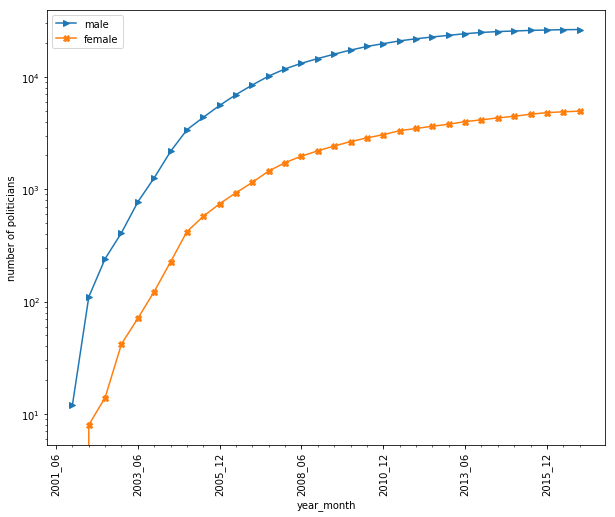

de


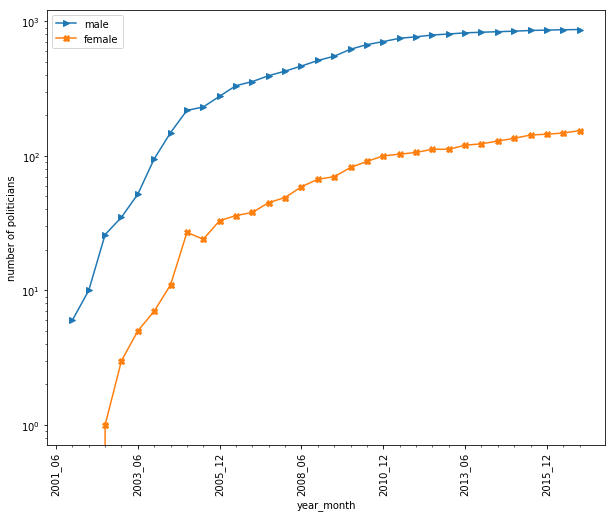

fr


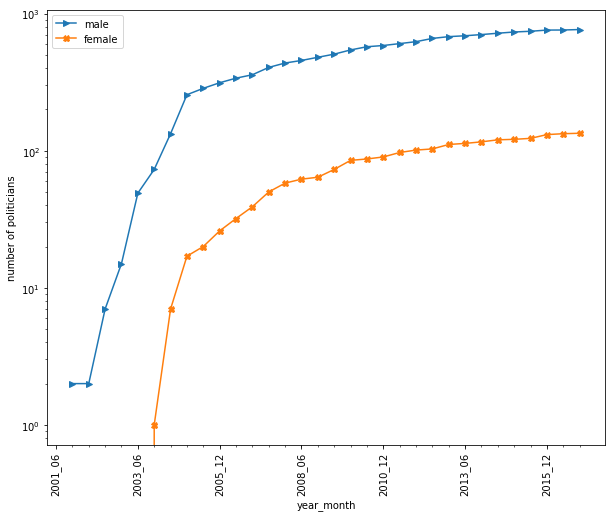

gb


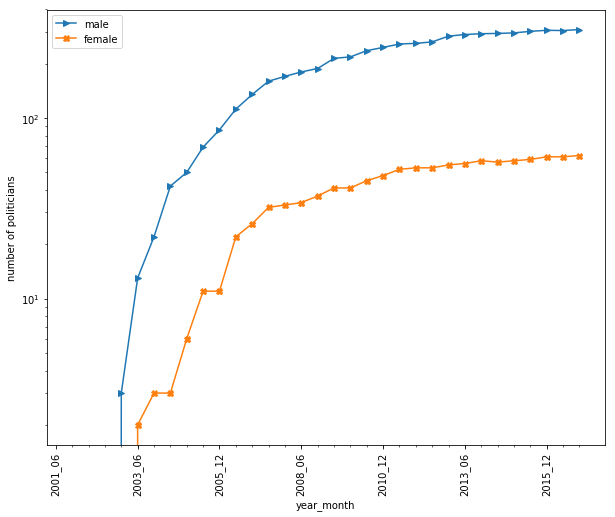

ru


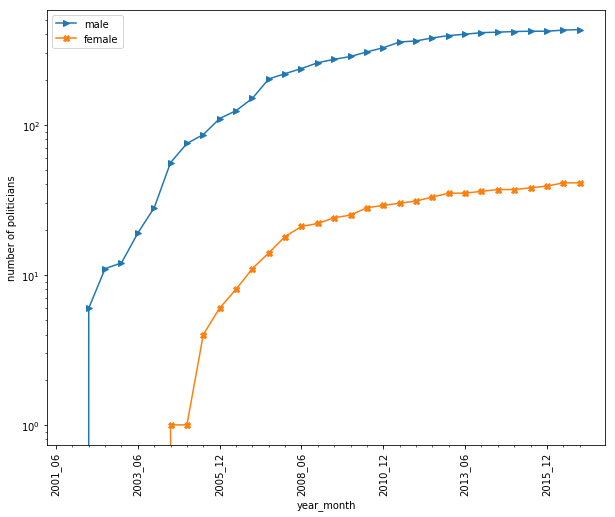

us


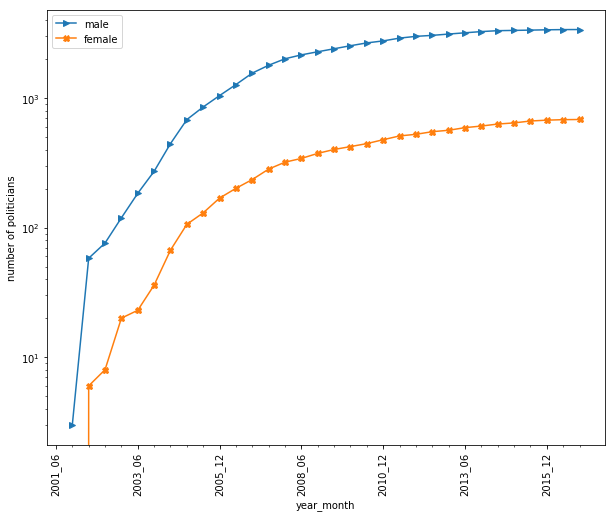

In [90]:
i = 0
for net in nets:
    print(names[i])
    plot_genders(net,names[i],"log")
    i = i +1

all


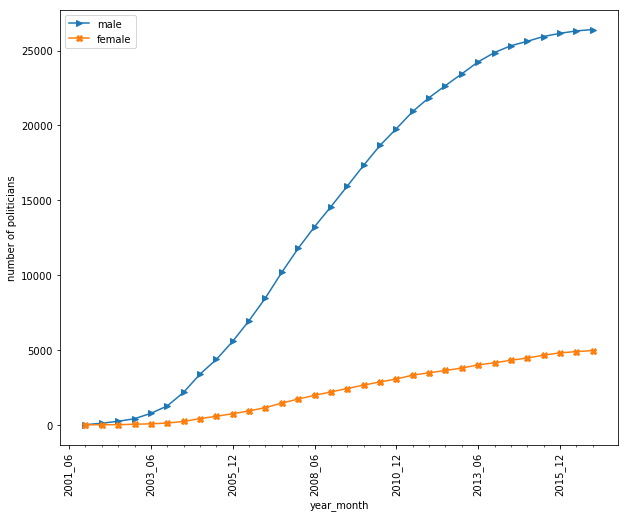

de


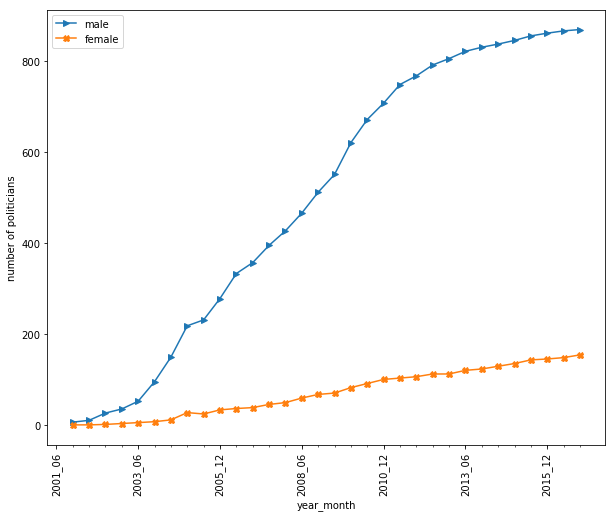

fr


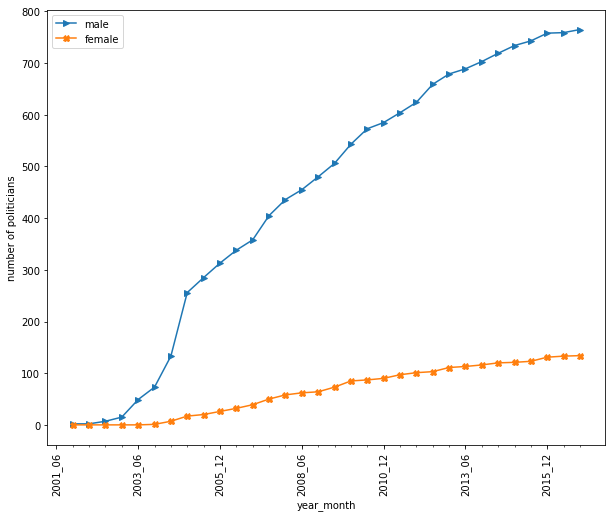

gb


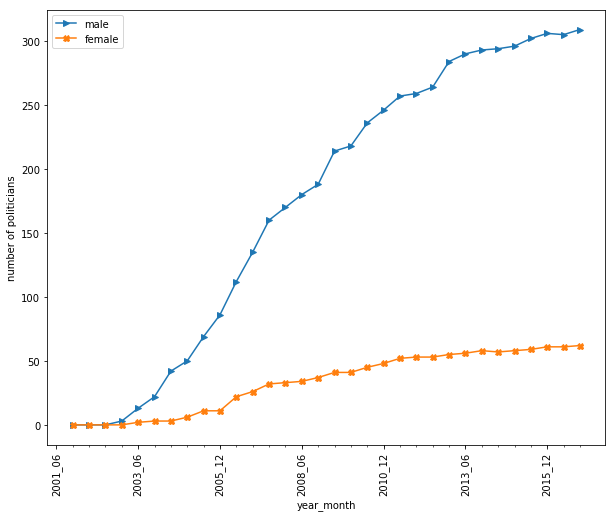

ru


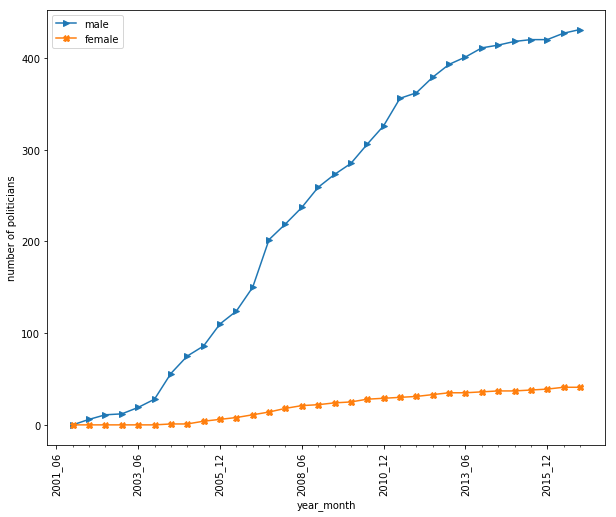

us


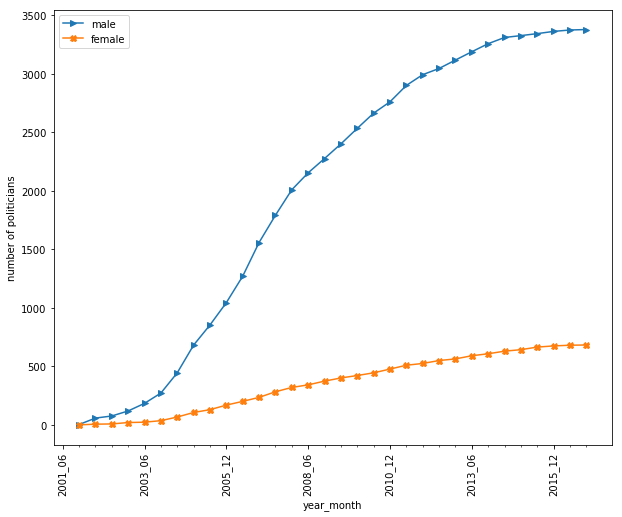

In [91]:
i = 0
for net in nets:
    print(names[i])
    plot_genders(net,names[i],"linear")
    i = i +1